# Pretrained Model 소개

https://keras.io/api/applications/

## VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
!unzip imagesDLCV.zip
!rm rf images/class1/.DS_Store

--2023-06-22 07:25:03--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/imagesDLCV.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.150.2
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.150.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1457845 (1.4M) [application/zip]
Saving to: ‘imagesDLCV.zip.1’

imagesDLCV.zip.1    100%[===================>]   1.39M  2.38MB/s    in 0.6s    

2023-06-22 07:25:04 (2.38 MB/s) - ‘imagesDLCV.zip.1’ saved [1457845/1457845]

Archive:  imagesDLCV.zip
replace images/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import cv2
from os import listdir
from os.path import isfile, join

In [ ]:
mypath = './images/class1/'
file_names = [f for f in listdir(mypath)if isfile(join(mypath,f))]
file_names

35363/35363 [==============================] - 0s 0us/step
[('n03026506', 'Christmas_stocking', 0.9999467), ('n04254777', 'sock', 3.607217e-05), ('n03775071', 'mitten', 6.3929756e-06)]
1/1 [==============================] - 0s 427ms/step
[('n03670208', 'limousine', 0.9995801), ('n03100240', 'convertible', 0.000187128), ('n02814533', 'beach_wagon', 7.670275e-05)]
1/1 [==============================] - 0s 407ms/step
[('n04275548', 'spider_web', 0.9770274), ('n01773797', 'garden_spider', 0.011418784), ('n01773549', 'barn_spider', 0.009331105)]
1/1 [==============================] - 0s 412ms/step
[('n02106662', 'German_shepherd', 0.9971668), ('n02105162', 'malinois', 0.0026627108), ('n02096051', 'Airedale', 2.9351337e-05)]
1/1 [==============================] - 0s 404ms/step
[('n03223299', 'doormat', 0.9920264), ('n04599235', 'wool', 0.0050805695), ('n02808304', 'bath_towel', 0.002183401)]
1/1 [==============================] - 0s 425ms/step
[('n02106030', 'collie', 0.8941201), ('n02105855

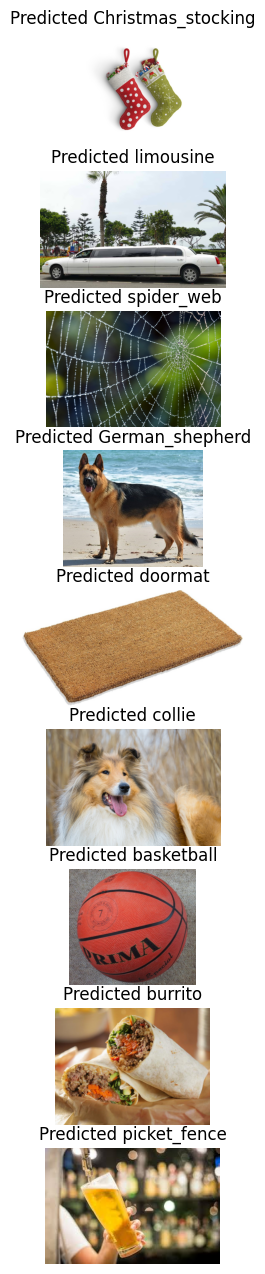

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

## ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f3b7137ec80>>

In [ ]:
print(model.summary)

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f3b7f7ee9e0>>


1/1 [==============================] - 1s 827ms/step
[('n03026506', 'Christmas_stocking', 0.99991715), ('n04254777', 'sock', 2.937125e-05), ('n04026417', 'purse', 8.8852785e-06)]
1/1 [==============================] - 0s 143ms/step
[('n03670208', 'limousine', 0.9998703), ('n03770679', 'minivan', 5.540602e-05), ('n02814533', 'beach_wagon', 4.2702886e-05)]
1/1 [==============================] - 0s 133ms/step
[('n04275548', 'spider_web', 0.9995158), ('n01773797', 'garden_spider', 0.0003648915), ('n01773549', 'barn_spider', 9.726482e-05)]
1/1 [==============================] - 0s 133ms/step
[('n02106662', 'German_shepherd', 0.99951005), ('n02105162', 'malinois', 0.00026146896), ('n02115641', 'dingo', 6.813382e-05)]
1/1 [==============================] - 0s 137ms/step
[('n03223299', 'doormat', 0.9992799), ('n03530642', 'honeycomb', 0.00021676095), ('n02808304', 'bath_towel', 0.00014457443)]
1/1 [==============================] - 0s 141ms/step
[('n02106030', 'collie', 0.9782453), ('n02105855

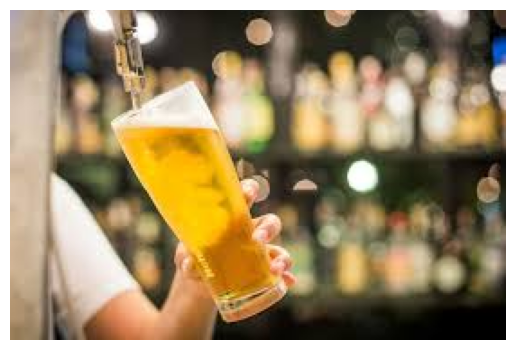

In [ ]:
# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

#InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

model = InceptionV3(weights='imagenet')
model.summary()

96112376/96112376 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)           

1/1 [==============================] - 1s 1s/step
[('n03026506', 'Christmas_stocking', 0.9989466), ('n04254777', 'sock', 4.028725e-05), ('n02028035', 'redshank', 3.130028e-05)]
1/1 [==============================] - 0s 166ms/step
[('n03670208', 'limousine', 0.9618102), ('n02917067', 'bullet_train', 0.00025204147), ('n02992529', 'cellular_telephone', 0.00025146955)]
1/1 [==============================] - 0s 172ms/step
[('n04275548', 'spider_web', 0.7573588), ('n01773797', 'garden_spider', 0.010265437), ('n04548362', 'wallet', 0.0071122716)]
1/1 [==============================] - 0s 170ms/step
[('n02106662', 'German_shepherd', 0.8696457), ('n03803284', 'muzzle', 0.02726312), ('n02091467', 'Norwegian_elkhound', 0.0017647396)]
1/1 [==============================] - 0s 224ms/step
[('n03223299', 'doormat', 0.94951695), ('n04599235', 'wool', 0.0028646006), ('n03482405', 'hamper', 0.0007972803)]
1/1 [==============================] - 0s 234ms/step
[('n02105855', 'Shetland_sheepdog', 0.8346253)

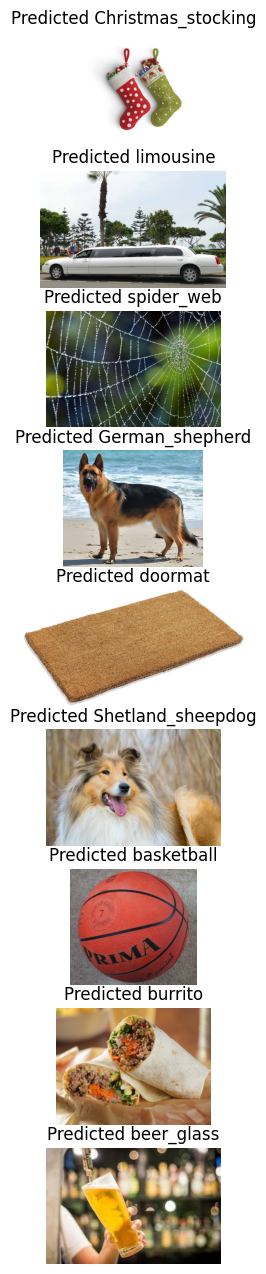

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    #note the change in input image size to 299,299
    img = image.load_img(mypath+file, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

1/1 [==============================] - 1s 806ms/step
[('n03026506', 'Christmas_stocking', 0.81594324), ('n04026417', 'purse', 0.045605283), ('n04254777', 'sock', 0.01834557)]
1/1 [==============================] - 0s 43ms/step
[('n03670208', 'limousine', 0.96992886), ('n03100240', 'convertible', 0.013073364), ('n04285008', 'sports_car', 0.0016793793)]
1/1 [==============================] - 0s 40ms/step
[('n04275548', 'spider_web', 0.77540076), ('n01773797', 'garden_spider', 0.04064788), ('n01773549', 'barn_spider', 0.03886929)]
1/1 [==============================] - 0s 42ms/step
[('n02106662', 'German_shepherd', 0.9584501), ('n02115641', 'dingo', 0.0025129803), ('n02105162', 'malinois', 0.0022183952)]
1/1 [==============================] - 0s 36ms/step
[('n04548362', 'wallet', 0.5071698), ('n03223299', 'doormat', 0.46503913), ('n04599235', 'wool', 0.0030549169)]
1/1 [==============================] - 0s 42ms/step
[('n02106030', 'collie', 0.88577133), ('n02105855', 'Shetland_sheepdog', 

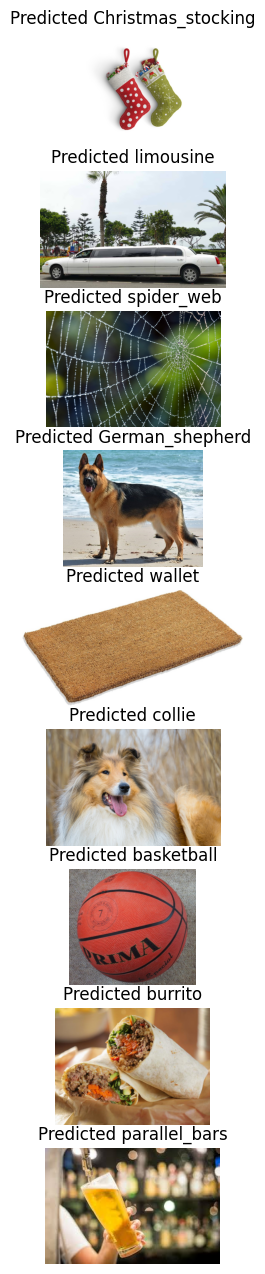

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    #from keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import numpy as np

model = DenseNet201(weights='imagenet')
model.summary()

82524592/82524592 [==============================] - 0s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_6[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

1/1 [==============================] - 2s 2s/step
[('n03026506', 'Christmas_stocking', 0.9999521), ('n04254777', 'sock', 3.9000734e-05), ('n03908618', 'pencil_box', 4.937168e-06)]
1/1 [==============================] - 0s 177ms/step
[('n03670208', 'limousine', 0.99995506), ('n03100240', 'convertible', 3.466866e-05), ('n02814533', 'beach_wagon', 3.9911247e-06)]
1/1 [==============================] - 0s 183ms/step
[('n04275548', 'spider_web', 0.9788865), ('n01773797', 'garden_spider', 0.009407909), ('n01773157', 'black_and_gold_garden_spider', 0.005638157)]
1/1 [==============================] - 0s 168ms/step
[('n02106662', 'German_shepherd', 0.96719146), ('n02115641', 'dingo', 0.0032396947), ('n02105162', 'malinois', 0.0024878967)]
1/1 [==============================] - 0s 175ms/step
[('n03223299', 'doormat', 0.99987245), ('n02808304', 'bath_towel', 5.1700827e-05), ('n04599235', 'wool', 3.3841683e-05)]
1/1 [==============================] - 0s 168ms/step
[('n02106030', 'collie', 0.69983

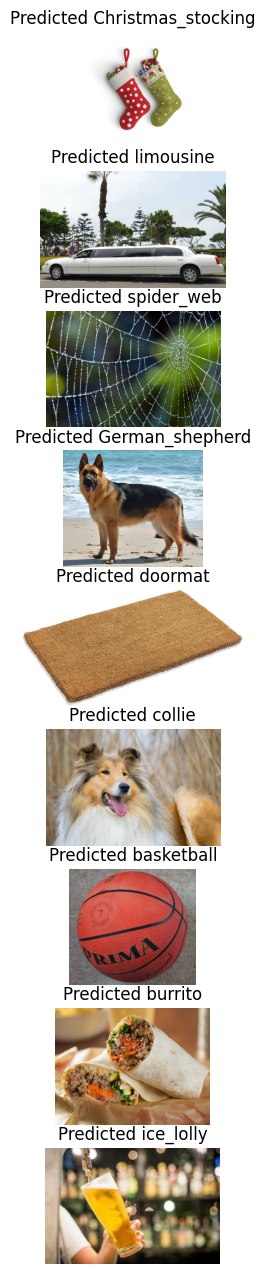

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

model = EfficientNetB7(weights='imagenet')
model.summary()

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

ValueError: ignored

<Figure size 1600x1600 with 0 Axes>